In [191]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import time

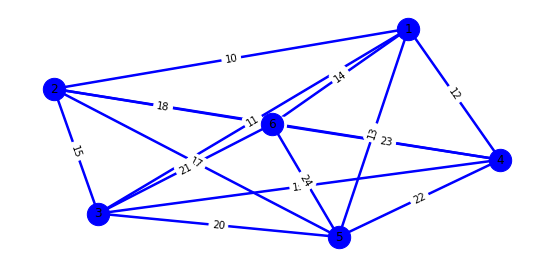

In [133]:
g1 = nx.Graph()
g1.add_edge(1,2,weight=10)
d[1,2]=10
g1.add_edge(1,3,weight=11)
d[1,3]=11
g1.add_edge(1,4,weight=12)
d[1,4]=12
g1.add_edge(1,5,weight=13)
d[1,5]=13
g1.add_edge(1,6,weight=14)
d[1,6]=14
g1.add_edge(2,3,weight=15)
d[2,3]=15
g1.add_edge(2,4,weight=16)
d[2,4]=16
g1.add_edge(2,5,weight=17)
d[2,5]=17
g1.add_edge(2,6,weight=18)
d[2,6]=18
g1.add_edge(3,4,weight=19)
d[3,4]=19
g1.add_edge(3,5,weight=20)
d[3,5]=20
g1.add_edge(3,6,weight=21)
d[3,6]=21
g1.add_edge(4,5,weight=22)
d[4,5]=22
g1.add_edge(4,6,weight=23)
d[4,6]=23
g1.add_edge(5,6,weight=24)
d[5,6]=24
pos = nx.spring_layout(g1)
nx.draw(g1,pos,with_labels=True,node_size=500,node_color='blue')
nx.draw_networkx_edge_labels(g1,pos,font_size=10,edge_labels=nx.get_edge_attributes(g1,'weight'))
nx.draw_networkx_edges(g1,pos,edge_color='blue',width=2.5)
plt.show()

In [134]:
cycles_possibles = list(itertools.permutations([1,2,3,4,5,6]))
#print(cycles_possibles)
print(len(cycles_possibles))

720


100
On a obtenu le resultat en 0.005316257476806641 secondes 
Voilà le chemin optimal et ceci en partant de la ville 1
Suivant ce chemin 1 -> 4 -> 2 -> 5 -> 3 -> 6
Ce chemin coûte 100


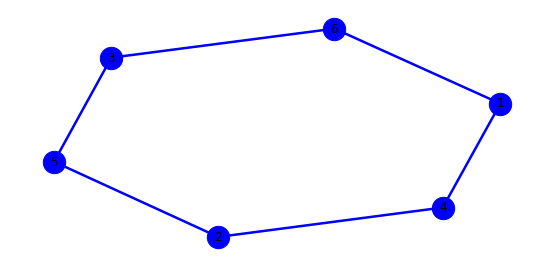

In [196]:
plus_courte_logueur = 0
debut = time.time()
cycle
for i in range (len(cycles_possibles)):
    sum = 0
    for j in range(6):
        a = cycles_possibles[i][j]
        b = cycles_possibles[i][(j+1)%6]
        if a<=b :
            sum += d[a,b]
        else :
            sum += d[b,a]
    if (sum < plus_courte_logueur) or (i==0):
        cycle =  cycles_possibles[i] 
        plus_courte_logueur = sum
    
fin = time.time()
print(plus_courte_logueur)
print("On a obtenu le resultat en {} secondes ".format(fin-debut))
print("Voilà le chemin optimal et ceci en partant de la ville {}".format(cycle[0]))
print("Suivant ce chemin {} -> {} -> {} -> {} -> {} -> {}".format(cycle[0],cycle[1],cycle[2],cycle[3],cycle[4],cycle[5],))
gc = nx.Graph()
cout = 0
for i in range(6):
    gc.add_edge(cycle[i],cycle[(i+1)%6])
    if cycle[i] <= cycle[(i+1)%6]:
        cout +=d[cycle[i],cycle[(i+1)%6]]
    else :
        cout +=d[cycle[(i+1)%6],cycle[i]]
        
print("Ce chemin coûte {}".format(cout))


pos = nx.spring_layout(gc)
nx.draw(gc,pos,with_labels=True,node_size=500,node_color='blue')
nx.draw_networkx_edges(gc,pos,edge_color='blue',width=2.5)
plt.show()

le chemin : 1-> 2 -> 4 -> 6 -> 5 -> 3
0.000997304916381836
Ce chemin coûte 104


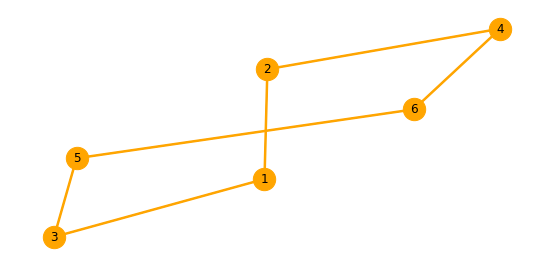

In [195]:
f = np.zeros(6, dtype = int)
f[0] = 1
no = 0
debut2 = time.time()
while no < 6 :
    o = np.zeros(6, dtype = int)
    j = -1
    for i in range(2,7):
        if i not in f:
            j += 1
            o[j] = i
    min = 0
    for i in range(j):
        if f[no] < o[i]:
            dis = d[f[no],o[i]]
        else :
            dis = d[o[i], f[no]]
        if (dis < min) or (i==0):
            min = dis
            index = i

    no +=1
    if (index<6) and (no<6):
        f[no] = o[index]
    
fin2 = time.time()    
print("le chemin : 1-> 2 -> 4 -> 6 -> 5 -> 3")
print(fin2-debut2)
cout = 0
gc2 = nx.Graph()
for i in range(6):
    if f[i] <= f[(i+1)%6]:
        cout +=d[f[i],f[(i+1)%6]]
    else :
        cout +=d[f[(i+1)%6],f[i]]
gc2.add_edge(1,2)
gc2.add_edge(2,4)
gc2.add_edge(4,6)
gc2.add_edge(6,5)
gc2.add_edge(5,3)
gc2.add_edge(3,1)
            
print("Ce chemin coûte {}".format(cout))  
pos = nx.spring_layout(gc2)
nx.draw(gc2,pos,with_labels=True,node_size=500,node_color='orange')
nx.draw_networkx_edges(gc2,pos,edge_color='orange',width=2.5)
plt.show()